# Proyek Analisis Data: AirQuality Dataset pada stasiun Wanshouxigong
- **Nama:** Alexzander Purwoko Widiantoro
- **Email:** purwoko908@gmail.com
- **ID Dicoding:** alexzforger

## Menentukan Pertanyaan Bisnis

- Bagaimana index polusi udara dalam beberapa bulan atau tahun terakhir yang tertulis dalam index PM2.5 dan PM10? Apakah ada peningkatan pada setiap bulannya ?
- Berapa emisi gas karbon (CO) yang keluar dalam beberapa bulan terakhir ?
- Apakah ada hubungan antara turunnya hujan dengan menurunnya kadar polusi udara PM2.5 ?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
airquality_df = pd.read_csv('https://github.com/marceloreis/HTI/raw/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv')
airquality_df.head(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong
5,6,2013,3,1,5,10.0,10.0,4.0,8.0,200.0,64.0,-1.6,1024.7,-21.1,0.0,NE,2.0,Wanshouxigong
6,7,2013,3,1,6,8.0,8.0,6.0,13.0,300.0,61.0,-2.4,1025.4,-20.3,0.0,NE,2.3,Wanshouxigong
7,8,2013,3,1,7,8.0,8.0,8.0,20.0,300.0,54.0,-0.8,1026.7,-19.9,0.0,NNE,2.0,Wanshouxigong
8,9,2013,3,1,8,3.0,6.0,9.0,23.0,300.0,50.0,0.4,1027.3,-19.4,0.0,NE,2.7,Wanshouxigong
9,10,2013,3,1,9,3.0,6.0,10.0,18.0,300.0,56.0,1.5,1027.4,-19.7,0.0,ENE,2.9,Wanshouxigong


**Insight:**
Dari head sejumlah 10 data diatas
- Terlihat bahwa penyajian data diatas urut, pada kolom nomor, ia urut dari 0 sampai seterusnya. Untuk year, month, day, dan hour adalah urutan waktu kejadian per satuan waktu (jam), diurutkan dari terlama ke terbaru.
- Terdapat kolom PM10, PM2.5, SO2 sampai RAIN dan wd. Kolom ini merupakan data atau attribut cuaca yang terjadi tiap jamnya.
- Kemudian kolom station, ini menunjukkan station pengukuran mana data ini diambil. Dari data ini sudah pasti hanya satu stationnya, yakni wanshouxigong

### Assessing Data

Mari kita lihat struktur data dari dataframe air quality ini dengan menggunakan info()

In [3]:
airquality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Terlihat bahwa kolom yang merupakan attribute cuaca/data disimpan dalam value float. Data pada year, month, day, dan hour merepresentasikan time, yang ditulis dalam bentuk desimal.

Langkah selanjutnya ialah memeriksa apakah ada missing value pada suatu column, karena sensor bisa saja mati atau sedang rusak.

In [4]:
airquality_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,696
PM10,484
SO2,669
NO2,754
CO,1297


Terlihat bahwa terdapat banyak missing value dari data yang disajikan. Pemeriksaan selanjutnya adalah mengenai duplikasi data. Ada berapa kah data yang terduplikasi dalam dataframe ini ?

In [5]:
print("Jumlah duplikasi: ", airquality_df.duplicated().sum())

Jumlah duplikasi:  0


Untungnya tidak ada data yang terduplikasi pada dataframe ini. Dataframe ini memang benar - benar timeseries, berisi tentang urutan waktu suatu kejadian ukuran cuaca.

Pemeriksaan selanjutnya ialah mengenali persebaran data, apakah nilai - nilai dari attribute masuk akal?

In [6]:
airquality_df.describe()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34368.000000,34580.000000,34395.000000,34310.00000,33767.000000,33986.000000,35045.000000,35045.000000,35045.000000,35045.000000,35051.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.024136,112.223459,17.148603,55.52956,1370.395031,56.229904,13.784477,1011.511804,2.707442,0.064320,1.745314
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.975981,97.593210,23.940834,35.80805,1223.139114,57.082710,11.385156,10.570928,13.704139,0.796981,1.206355
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.00000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,28.00000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.00000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,154.000000,21.000000,77.00000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,961.000000,411.000000,251.00000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000


Dar deskripsi data diatas, ditemukan keanehan pada data PM2.5, PM10, SO2, CO,dan O3. Nilai maximum dari attribute tersebut cukup aneh, dibuktikan dengan cukup jauhnya ketimpangan dengan nilai IQR dan juga mean.


**Insight hingga saat ini:**
- Terdapat banyak missing value, terutama pada data attribute seperti PM2.5, CO, O3, dan lain - lain.
- Terdapat keanehan pada nilai max dari PM2.5, PM10, SO2, CO, dan O3, di mana nilai maximumnya sangat melebihi nilai dari mean dan juga iqr.

### Cleaning Data

Rencana pertama untuk deal dengan missing value adalah menggunakan interpolation linear untuk column PM2.5. Interpolation ini menghadirkan nilai rata - rata dari column sebelum dan sesudahnya untuk mencari nilai yang hilang tersebut. Pertimbangan dari kenapa menggunakan cara ini adalah nilai PM2.5 cenderung tidak ada perubahan yang signifikan dalam rentang waktu satu jam.

In [7]:
airquality_df['PM2.5'] = airquality_df['PM2.5'].fillna(
    airquality_df['PM2.5'].interpolate(method='linear')
)
print("Jumlah missing value setelah interpolation: ", airquality_df['PM2.5'].isna().sum())

Jumlah missing value setelah interpolation:  0


Mari kita lihat apakah ada perubahan dari persebaran data-nya ?

In [8]:
airquality_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34580.000000,34395.000000,34310.00000,33767.000000,33986.000000,35045.000000,35045.000000,35045.000000,35045.000000,35051.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.067548,112.223459,17.148603,55.52956,1370.395031,56.229904,13.784477,1011.511804,2.707442,0.064320,1.745314
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.999698,97.593210,23.940834,35.80805,1223.139114,57.082710,11.385156,10.570928,13.704139,0.796981,1.206355
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.00000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,28.00000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.00000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,154.000000,21.000000,77.00000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,961.000000,411.000000,251.00000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000


Ternyata ada namun cukup sedikit pada mean dan std (sekitar 0.02). Dalam hal ini bisa diabaikan dan lanjut ke tahap selanjutnya, yakni menganalisa nilai max dari PM2.5. Nilai yang tidak masuk akal tersebut cenderung diakibatkan oleh malfunctioning sensor.

#### PM2.5
Disini yang dilakukan masking adalah nilai 3x dari iqr max PM2.5 (Setelah dilakukan percobaan adalah 395) yang mana adalah batas maksimum dari Tidak Sehat.

In [9]:
pm25_q1 = airquality_df['PM2.5'].quantile(0.25)
pm25_q3 = airquality_df['PM2.5'].quantile(0.75)
pm25_iqr = pm25_q3 - pm25_q1

pm25_max = pm25_q3 + (3 * pm25_iqr)

print("Q1: ", pm25_q1)
print("Q3: ", pm25_q3)
print("IQR: ", pm25_iqr)
print("Max: ", pm25_max)

airquality_df['PM2.5'].mask(airquality_df['PM2.5'] > pm25_max, pm25_max, inplace=True)

Q1:  23.0
Q3:  116.0
IQR:  93.0
Max:  395.0


In [10]:
airquality_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34580.000000,34395.000000,34310.00000,33767.000000,33986.000000,35045.000000,35045.000000,35045.000000,35045.000000,35051.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.083376,112.223459,17.148603,55.52956,1370.395031,56.229904,13.784477,1011.511804,2.707442,0.064320,1.745314
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.317599,97.593210,23.940834,35.80805,1223.139114,57.082710,11.385156,10.570928,13.704139,0.796981,1.206355
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.00000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,28.00000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.00000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,154.000000,21.000000,77.00000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,395.000000,961.000000,411.000000,251.00000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000


Nah saat ini nilai PM2.5 sudah cukup masuk akal. Selanjutnya adalah mereplikasikannya ke attribute yang lain.

#### PM10

In [11]:
airquality_df['PM10'] = airquality_df['PM10'].fillna(
    airquality_df['PM10'].interpolate(method='linear')
)
print("Jumlah missing value setelah interpolation: ", airquality_df['PM10'].isna().sum())

Jumlah missing value setelah interpolation:  0


In [12]:
airquality_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34395.000000,34310.00000,33767.000000,33986.000000,35045.000000,35045.000000,35045.000000,35045.000000,35051.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.083376,112.505795,17.148603,55.52956,1370.395031,56.229904,13.784477,1011.511804,2.707442,0.064320,1.745314
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.317599,98.132120,23.940834,35.80805,1223.139114,57.082710,11.385156,10.570928,13.704139,0.796981,1.206355
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.00000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,28.00000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.00000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,154.000000,21.000000,77.00000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,395.000000,961.000000,411.000000,251.00000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000


In [13]:
pm10_q1 = airquality_df['PM10'].quantile(0.25)
pm10_q3 = airquality_df['PM10'].quantile(0.75)
pm10_iqr = pm10_q3 - pm25_q1

pm10_max = pm10_q3 + (3 * pm10_iqr)

print("Q1: ", pm10_q1)
print("Q3: ", pm10_q3)
print("IQR: ", pm10_iqr)
print("Max: ", pm10_max)

airquality_df['PM10'].mask(airquality_df['PM10'] > pm10_max, pm10_max, inplace=True)

Q1:  39.0
Q3:  154.0
IQR:  131.0
Max:  547.0


In [14]:
airquality_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34395.000000,34310.00000,33767.000000,33986.000000,35045.000000,35045.000000,35045.000000,35045.000000,35051.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.083376,112.040060,17.148603,55.52956,1370.395031,56.229904,13.784477,1011.511804,2.707442,0.064320,1.745314
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.317599,95.556238,23.940834,35.80805,1223.139114,57.082710,11.385156,10.570928,13.704139,0.796981,1.206355
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.00000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,28.00000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.00000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,154.000000,21.000000,77.00000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,395.000000,547.000000,411.000000,251.00000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000


#### CO

In [15]:
airquality_df['CO'] = airquality_df['CO'].fillna(
    airquality_df['CO'].interpolate(method='linear')
)
print("Jumlah missing value setelah interpolation: ", airquality_df['CO'].isna().sum())

Jumlah missing value setelah interpolation:  0


In [16]:
airquality_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34395.000000,34310.00000,35064.000000,33986.000000,35045.000000,35045.000000,35045.000000,35045.000000,35051.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.083376,112.040060,17.148603,55.52956,1373.618569,56.229904,13.784477,1011.511804,2.707442,0.064320,1.745314
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.317599,95.556238,23.940834,35.80805,1228.161525,57.082710,11.385156,10.570928,13.704139,0.796981,1.206355
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.00000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,28.00000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.00000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,154.000000,21.000000,77.00000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,395.000000,547.000000,411.000000,251.00000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000


In [17]:
co_q1 = airquality_df['CO'].quantile(0.25)
co_q3 = airquality_df['CO'].quantile(0.75)
co_iqr = co_q3 - co_q1

co_max = co_q3 + (3 * co_iqr)

print("Q1: ", co_q1)
print("Q3: ", co_q3)
print("IQR: ", co_iqr)
print("Max: ", co_max)

airquality_df['CO'].mask(airquality_df['CO'] > co_max, co_max, inplace=True)

Q1:  600.0
Q3:  1700.0
IQR:  1100.0
Max:  5000.0


In [18]:
airquality_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34395.000000,34310.00000,35064.000000,33986.000000,35045.000000,35045.000000,35045.000000,35045.000000,35051.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.083376,112.040060,17.148603,55.52956,1339.690174,56.229904,13.784477,1011.511804,2.707442,0.064320,1.745314
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.317599,95.556238,23.940834,35.80805,1084.514101,57.082710,11.385156,10.570928,13.704139,0.796981,1.206355
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.00000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,28.00000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.00000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,154.000000,21.000000,77.00000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,395.000000,547.000000,411.000000,251.00000,5000.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000


Untuk pengecekan terakhir, mari kita lihat apakah semua data sudah terbebas dari NULL?

In [19]:
airquality_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,669
NO2,754
CO,0


Ternyata tidak, masih ada beberapa null value di beberapa titik, seperti SO2, NO2, O3 dan beberapa value di TEMP, PRES, DEWP, RAIN, wd, dan WSPM.

#### SO, NO2, dan O3 interpolate Null values


Selanjutnya kita akan melakukan perbaikan pada nilai partikulat pencemaran udara terlebih dahulu. Penerapan missing value masih menggunakan cara yang sama dengan sebelumnya, yakni interpolation karena asumsinya perubahan kondisi antara sebelum dan sesudah dari lokasi missing value tidak terlalu signifikan.

In [20]:
airquality_df['SO2'] = airquality_df['SO2'].fillna(
    airquality_df['SO2'].interpolate(method='linear')
)
airquality_df['NO2'] = airquality_df['NO2'].fillna(
    airquality_df['NO2'].interpolate(method='linear')
)
airquality_df['O3'] = airquality_df['O3'].fillna(
    airquality_df['O3'].interpolate(method='linear')
)

In [21]:
airquality_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35045.000000,35045.000000,35045.000000,35045.000000,35051.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.083376,112.040060,17.363354,55.495402,1339.690174,55.919979,13.784477,1011.511804,2.707442,0.064320,1.745314
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.317599,95.556238,24.171627,35.833026,1084.514101,57.156365,11.385156,10.570928,13.704139,0.796981,1.206355
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,28.000000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.000000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,154.000000,21.000000,77.000000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,395.000000,547.000000,411.000000,251.000000,5000.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000


Kemudian, untuk nilai lainnya seperti TEMP, PRES, DEWP, dan RAIN ini masih ada puluhan data yang kosong. Asumsinya, nilai ini (terutama RAIN) itu bisa berubah signifikan pada suatu waktu, sehingga opsi interpolation ini bukan suatu solusi karena bisa mengaburkan data. Karena hanya puluhan, maka data tersebut bisa dikorbankan untuk dihapus saja.

#### DROP Data

Dimulai dari kolom RAIN terlebih dahulu.

In [22]:
airquality_df.drop(airquality_df[airquality_df['RAIN'].isna()].index, inplace=True)
airquality_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


Ternyata data sudah cukup bersih dari null values, tinggal satu kolom lagi yakni `wd`. Mungkin kolom ini berisi terkait data weight direction. Akan tetapi, di analisis ini tidak membutuhkan hal tersebut, maka dari itu kolom ini di drop.

In [23]:
airquality_df.drop('wd', axis=1, inplace=True)
airquality_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


**Insight:**
- Data PM2.5, PM10 dan CO sudah berhasil diperbaiki dengan sedikit perubahan pada std dan mean. Persebaran antar quartil masih menunjukkan nilai yang sama.
- Untuk attribute lainnya (seperti SO2, NO2, dan lain - lain) masih menunjukkan nilai yang make sense (tidak dirasa outlier), sehingga tidak perlu penyesuaian lebih.

## Exploratory Data Analysis (EDA)

### Explore Dataframe Air Quality

Dimulai dengan melihat deskripsi dari data airquality

In [24]:
airquality_df.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,station
count,35045.000000,35045.000000,35045.000000,35045.000000,35045.000000,35045.000000,35045.000000,35045.000000,35045.000000,35045.000000,35045.000000,35045.000000,35045.000000,35045.000000,35045.000000,35045.000000,35045
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wanshouxigong
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35045
mean,17524.560451,2014.661549,6.524297,15.726808,11.499729,84.081681,112.046245,17.363979,55.497925,1339.511359,55.918309,13.784477,1011.511804,2.707442,0.064320,1.745139,NaN
std,10118.866859,1.176650,3.448036,8.800893,6.922235,81.333501,95.576685,24.175816,35.835876,1084.572754,57.161768,11.385156,10.570928,13.704139,0.796981,1.206259,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000,NaN
25%,8762.000000,2014.000000,4.000000,8.000000,5.000000,23.000000,39.000000,3.000000,28.000000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000,NaN
50%,17524.000000,2015.000000,7.000000,16.000000,11.000000,60.000000,91.000000,8.000000,49.000000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000,NaN
75%,26285.000000,2016.000000,10.000000,23.000000,17.000000,116.000000,154.000000,21.000000,77.000000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000,NaN


Kemudian melihat 20 sampel data dari dataframe

In [25]:
airquality_df.sample(20)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,station
244,245,2013,3,11,4,111.0,113.0,70.0,67.0,1300.0,85.0000,-1.9,1016.1,-8.0,0.0,0.2,Wanshouxigong
5686,5687,2013,10,23,22,12.0,97.0,1.0,15.0,400.0,47.0000,9.3,1020.0,-8.3,0.0,2.7,Wanshouxigong
33694,33695,2017,1,2,22,275.0,275.0,7.0,133.0,3800.0,7.0000,-1.6,1020.7,-7.9,0.0,0.8,Wanshouxigong
5527,5528,2013,10,17,7,133.0,189.0,6.0,90.0,2000.0,2.0000,7.4,1021.4,6.7,0.0,0.7,Wanshouxigong
11574,11575,2014,6,26,6,176.0,176.0,2.0,29.0,1300.0,48.0000,23.6,997.1,20.3,0.0,0.6,Wanshouxigong
17331,17332,2015,2,21,3,190.0,190.0,8.0,51.0,1900.0,10.0000,1.0,1008.0,0.4,0.0,1.2,Wanshouxigong
25479,25480,2016,1,26,15,18.0,35.0,12.0,17.0,200.0,68.0000,1.1,1022.7,-22.7,0.0,3.5,Wanshouxigong
33279,33280,2016,12,16,15,199.0,220.0,30.0,120.0,2300.0,19.0000,6.9,1018.9,-8.7,0.0,1.6,Wanshouxigong
15037,15038,2014,11,17,13,12.0,18.0,10.0,29.0,500.0,52.0000,12.1,1029.0,-10.9,0.0,2.4,Wanshouxigong
30330,30331,2016,8,15,18,16.0,32.0,2.0,22.0,500.0,77.0000,28.2,1002.3,16.5,0.0,1.3,Wanshouxigong


**Insight:**
- Setelah ditelaah dengan seksama, ternyata cukup overwhelm dengan menampilkan keseluruhan kolom. Akan lebih baik jika sesuai dengan peruntukan pertanyaannya
- Karena ini merupakan sebuah time-series, maka setiap visualisasi akan diasosiasikan dengan dataframe di variabel terpisah, dengan menyertakan timestamp (year, month, day, hour).
- Data timestamp yang terpecah perlu dijadikan satu kolom timestamp agar lebih compact dan bisa lebih dapat visuaisasinya

In [26]:
airquality_df['timestamp'] = pd.to_datetime(airquality_df[['year', 'month', 'day', 'hour']])
airquality_df.set_index('timestamp', inplace=True)
airquality_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,station
timestamp,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,2.0,Wanshouxigong
2013-03-01 01:00:00,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,4.4,Wanshouxigong
2013-03-01 02:00:00,3,2013,3,1,2,8.0,8.0,5.0,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,4.7,Wanshouxigong
2013-03-01 03:00:00,4,2013,3,1,3,8.0,8.0,3.0,16.0,250.0,47.5,-0.7,1023.5,-20.9,0.0,2.6,Wanshouxigong
2013-03-01 04:00:00,5,2013,3,1,4,8.0,8.0,3.0,12.0,300.0,36.0,-0.9,1024.1,-21.7,0.0,2.5,Wanshouxigong


Drop tabel No, year, month, day, dan hour karena sudah tidak terpakai lagi.

In [27]:
airquality_df.drop(['No', 'year', 'month', 'day', 'hour'], axis=1, inplace=True)
airquality_df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,station
timestamp,,,,,,,,,,,,
2013-03-01 00:00:00,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,2.0,Wanshouxigong
2013-03-01 01:00:00,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,4.4,Wanshouxigong
2013-03-01 02:00:00,8.0,8.0,5.0,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,4.7,Wanshouxigong
2013-03-01 03:00:00,8.0,8.0,3.0,16.0,250.0,47.5,-0.7,1023.5,-20.9,0.0,2.6,Wanshouxigong
2013-03-01 04:00:00,8.0,8.0,3.0,12.0,300.0,36.0,-0.9,1024.1,-21.7,0.0,2.5,Wanshouxigong


Kemudian memecah data berdasarkan peruntukan visualisasinya.

In [28]:
pm25_and_pm10_df = airquality_df[['PM2.5', 'PM10']]
co_df = airquality_df[['CO']]
pm25_with_rain_df = airquality_df[['PM2.5', 'RAIN']]

### PM2.5 & PM10

Mari ambil salah satu dataframe, yakni pada pm25_pm10_df. Saya penasaran terhadap output dari sepuluh data terakhir.

In [29]:
pm25_and_pm10_df.tail(10)

,PM2.5,PM10
timestamp,,
2017-02-28 14:00:00,3.0,6.0
2017-02-28 15:00:00,11.0,21.0
2017-02-28 16:00:00,6.0,20.0
2017-02-28 17:00:00,11.0,23.0
2017-02-28 18:00:00,11.0,30.0
2017-02-28 19:00:00,11.0,32.0
2017-02-28 20:00:00,13.0,32.0
2017-02-28 21:00:00,14.0,28.0
2017-02-28 22:00:00,12.0,23.0


Terlihat bahwa data tail diatas menunjukkan kronologi polusi udara dari jam 2 siang - 11 malam di tanggal 28 Februari 2017. Dari data ini, sepertinya menarik jika kita bisa melihat wujud visualisasi dari timeseries.

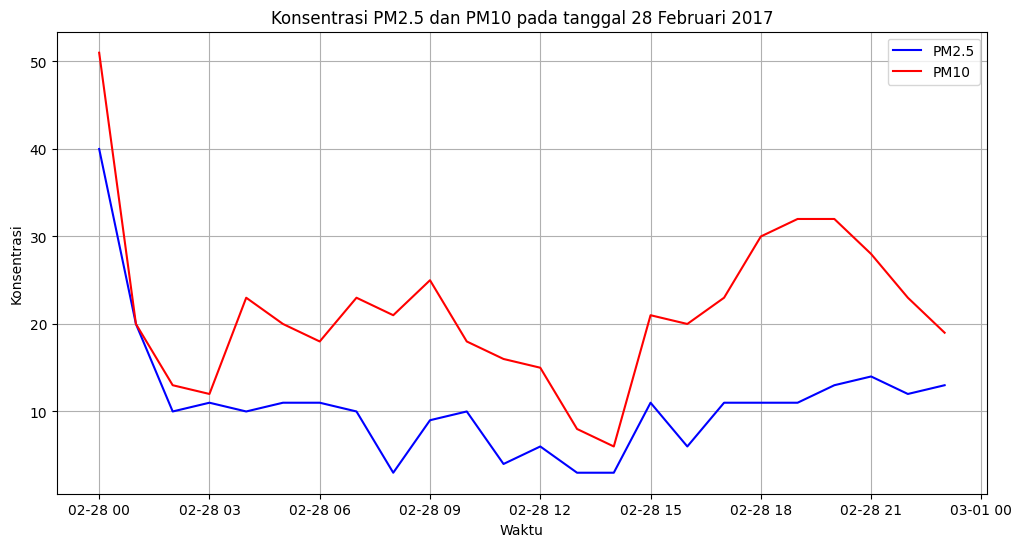

In [30]:
pm25_and_pm10_df_filtered = pm25_and_pm10_df.loc['2017-02-28 00:00:00':'2017-02-28 23:00:00']

plt.figure(figsize=(12, 6))
plt.plot(pm25_and_pm10_df_filtered.index, pm25_and_pm10_df_filtered['PM2.5'], label='PM2.5', color='blue')
plt.plot(pm25_and_pm10_df_filtered.index, pm25_and_pm10_df_filtered['PM10'], label='PM10', color='red')

plt.xlabel('Waktu')
plt.ylabel('Konsentrasi')
plt.title('Konsentrasi PM2.5 dan PM10 pada tanggal 28 Februari 2017')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


Terlihat bahwa output dari polusi PM2.5 dan PM10 ini cukup bervariasi dari waktu ke waktu. Data yang divisualisasikan merupakan data per jam, ini bagus dan sangat berguna untuk menganalisa tingkat polusi pada tingkat jam di setiap harinya.

Akan tetapi, apabila data ini kita visualisasikan secara langsung, akan susah bagi kita untuk melihat kronologi waktunya. Maka dari itu, akan lebih baik jika kita melihat dengan kacamata polusi yang terjadi per hari dalam bulannya. Untuk mengetahui kadar polusi per harinya, kita memerlukan rerata polusi udara per hari.

In [31]:
pm25_and_pm10_df_daily_mean = pm25_and_pm10_df.resample('D').mean()
pm25_and_pm10_df_daily_mean.tail(10)

,PM2.5,PM10
timestamp,,
2017-02-19,105.208333,146.541667
2017-02-20,13.791667,30.437500
2017-02-21,59.541667,73.562500
2017-02-22,90.000000,90.250000
2017-02-23,21.458333,30.395833
2017-02-24,39.958333,48.916667
2017-02-25,9.145833,15.895833
2017-02-26,28.520833,44.604167
2017-02-27,72.875000,92.500000


Berikut adalah visualisasi pada tahun 2016 (karena tahun terakhir yang memiliki bulan lengkap, Januari - Desember).

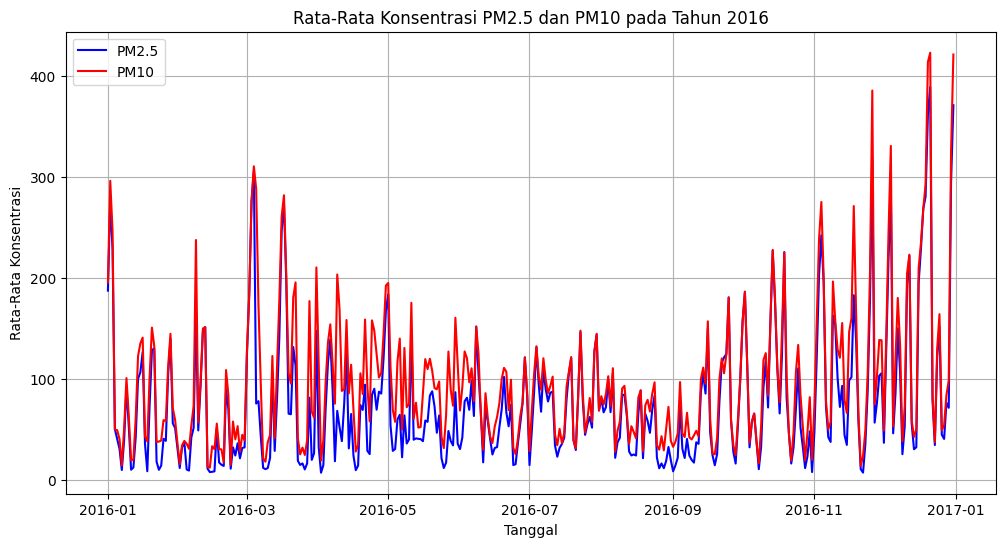

In [32]:
pm25_and_pm10_df_daily_mean_2016 = pm25_and_pm10_df_daily_mean.loc['2016-01-01':'2016-12-31']

plt.figure(figsize=(12, 6))
plt.plot(pm25_and_pm10_df_daily_mean_2016.index, pm25_and_pm10_df_daily_mean_2016['PM2.5'], label='PM2.5', color='blue')
plt.plot(pm25_and_pm10_df_daily_mean_2016.index, pm25_and_pm10_df_daily_mean_2016['PM10'], label='PM10', color='red')

plt.xlabel('Tanggal')
plt.ylabel('Rata-Rata Konsentrasi')
plt.title('Rata-Rata Konsentrasi PM2.5 dan PM10 pada Tahun 2016')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


Ternyata data yang ditampilkan cukup banyak. Mungkin perlu di resample lagi menjadi per bulan

In [33]:
pm25_and_pm10_df_monthly_mean = pm25_and_pm10_df.resample('M').mean()
pm25_and_pm10_df_monthly_mean.tail(10)

,PM2.5,PM10
timestamp,,
2016-05-31,55.112231,95.783199
2016-06-30,63.079861,80.795139
2016-07-31,74.420027,82.053091
2016-08-31,50.663978,64.594758
2016-09-30,58.217391,70.002104
2016-10-31,83.906586,95.061156
2016-11-30,106.381944,136.377778
2016-12-31,151.291667,169.022177
2017-01-31,123.875853,144.994543


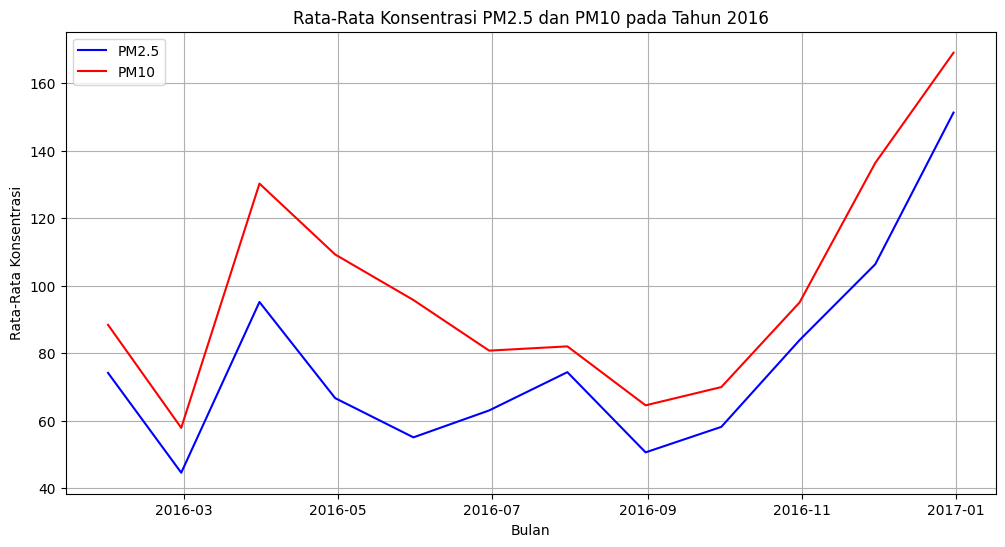

In [34]:
pm25_and_pm10_df_monthly_mean_2016 = pm25_and_pm10_df_monthly_mean.loc['2016-01-01':'2016-12-31']

plt.figure(figsize=(12, 6))
plt.plot(pm25_and_pm10_df_monthly_mean_2016.index, pm25_and_pm10_df_monthly_mean_2016['PM2.5'], label='PM2.5', color='blue')
plt.plot(pm25_and_pm10_df_monthly_mean_2016.index, pm25_and_pm10_df_monthly_mean_2016['PM10'], label='PM10', color='red')

plt.xlabel('Bulan')
plt.ylabel('Rata-Rata Konsentrasi')
plt.title('Rata-Rata Konsentrasi PM2.5 dan PM10 pada Tahun 2016')
plt.legend()
plt.grid(True)

plt.show()


### Data CO (Carbon Monoxide)
Kemudian untuk data CO bisa kita lakukan hal yang serupa dengan data PM10 dan juga PM2.5

In [35]:
co_df_monthly_mean = co_df.resample('M').mean()
co_df_monthly_mean.tail(10)

,CO
timestamp,
2016-05-31,724.327957
2016-06-30,838.055556
2016-07-31,997.446237
2016-08-31,932.459677
2016-09-30,861.290323
2016-10-31,1246.438172
2016-11-30,1810.694444
2016-12-31,2299.126344
2017-01-31,2025.688009


Berikut adalah visualisasi dari data satu tahun terakhir kadar CO dalam udara

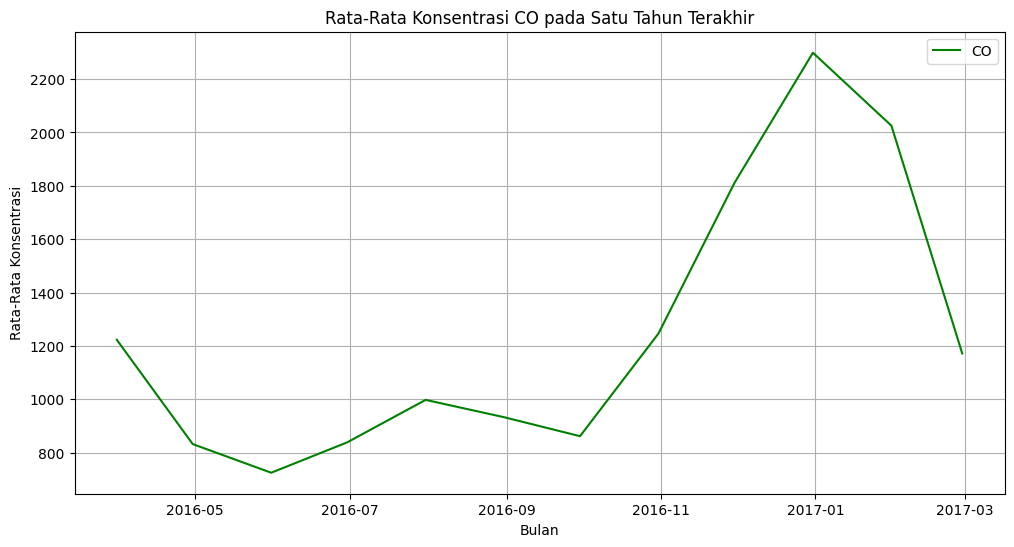

In [36]:
co_df_monthly_mean_last_year = co_df_monthly_mean.tail(12)

plt.figure(figsize=(12, 6))
plt.plot(co_df_monthly_mean_last_year.index, co_df_monthly_mean_last_year['CO'], label='CO', color='green')

plt.xlabel('Bulan')
plt.ylabel('Rata-Rata Konsentrasi')
plt.title('Rata-Rata Konsentrasi CO pada Satu Tahun Terakhir')
plt.legend()
plt.grid(True)

plt.show()


### Hubungan antara PM2.5 dan RAIN (curah hujan)

Hal pertama yang dilakukan ialah melihat datanya, terutama data terakhir

In [37]:
pm25_with_rain_df.tail(10)

,PM2.5,RAIN
timestamp,,
2017-02-28 14:00:00,3.0,0.0
2017-02-28 15:00:00,11.0,0.0
2017-02-28 16:00:00,6.0,0.0
2017-02-28 17:00:00,11.0,0.0
2017-02-28 18:00:00,11.0,0.0
2017-02-28 19:00:00,11.0,0.0
2017-02-28 20:00:00,13.0,0.0
2017-02-28 21:00:00,14.0,0.0
2017-02-28 22:00:00,12.0,0.0


Muncul satu pertanyaan, bagaimana kondisinya ketika curah hujan ada (>0) ?

In [38]:
pm25_with_rain_df[pm25_with_rain_df['RAIN'] > 0]

,PM2.5,RAIN
timestamp,,
2013-03-12 04:00:00,90.0,1.4
2013-03-12 05:00:00,103.0,1.2
2013-03-12 06:00:00,98.0,1.5
2013-03-12 07:00:00,125.0,2.0
2013-03-12 08:00:00,120.0,0.2
...,...,...
2017-02-21 19:00:00,40.0,0.4
2017-02-21 20:00:00,59.0,0.5
2017-02-21 21:00:00,62.0,0.8


Ternyata ada cukup banyak kejadian hujan, yakni sekitar 1361 kali kejadian. Setiap kejadian, angka dari PM2.5 menunjukkan skala yang kurang pasti. Bagaimana jika nilai dari RAIN dinormalisasikan menjadi nilai boolean? Yakni jika nilainya diatas 0, maka dianggap ada hujan, 0 tidak ada hujan. Diharapkan dari normalisasi ini, kita bisa melihat korelasinya dengan penurunan PM2.5

In [39]:
pm25_with_rain_df['HAS_RAIN'] = pm25_with_rain_df['RAIN'].apply(lambda x: 1 if x > 0 else 0)
pm25_with_rain_df.tail(10)

<ipython-input-39-c6b59df09bae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm25_with_rain_df['HAS_RAIN'] = pm25_with_rain_df['RAIN'].apply(lambda x: 1 if x > 0 else 0)


,PM2.5,RAIN,HAS_RAIN
timestamp,,,
2017-02-28 14:00:00,3.0,0.0,0
2017-02-28 15:00:00,11.0,0.0,0
2017-02-28 16:00:00,6.0,0.0,0
2017-02-28 17:00:00,11.0,0.0,0
2017-02-28 18:00:00,11.0,0.0,0
2017-02-28 19:00:00,11.0,0.0,0
2017-02-28 20:00:00,13.0,0.0,0
2017-02-28 21:00:00,14.0,0.0,0
2017-02-28 22:00:00,12.0,0.0,0


Tak lupa juga melakukan scaling pada PM2.5

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
pm25_with_rain_df['PM2.5_scaled'] = scaler.fit_transform(pm25_with_rain_df[['PM2.5']])

pm25_with_rain_df.head()


<ipython-input-40-e23d02fd4f9e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm25_with_rain_df['PM2.5_scaled'] = scaler.fit_transform(pm25_with_rain_df[['PM2.5']])


,PM2.5,RAIN,HAS_RAIN,PM2.5_scaled
timestamp,,,,
2013-03-01 00:00:00,9.0,0.0,0,0.015306
2013-03-01 01:00:00,11.0,0.0,0,0.020408
2013-03-01 02:00:00,8.0,0.0,0,0.012755
2013-03-01 03:00:00,8.0,0.0,0,0.012755
2013-03-01 04:00:00,8.0,0.0,0,0.012755


Kemudian, lakukan corr() pada dataframe tersebut.

In [41]:
pm25_with_rain_df.corr()

,PM2.5,RAIN,HAS_RAIN,PM2.5_scaled
PM2.5,1.000000,-0.020933,-0.050535,1.000000
RAIN,-0.020933,1.000000,0.401503,-0.020933
HAS_RAIN,-0.050535,0.401503,1.000000,-0.050535
PM2.5_scaled,1.000000,-0.020933,-0.050535,1.000000


Nilai korelasi menunjukkan angka dibawah 0, yang berarti tidak ada korelasinya secara nilai statistika. Akan tetapi, saya penasaran dengan output dari visualisasi terhadap komparasi antara PM2.5 dengan turunnya curah hujan. Mungkin bisa mengambil dari waktu adanya curah hujan tertinggi kemudian ambil juga waktu setelahnya.

In [42]:
pm25_with_rain_df[pm25_with_rain_df['RAIN'] > 1.0]

,PM2.5,RAIN,HAS_RAIN,PM2.5_scaled
timestamp,,,,
2013-03-12 04:00:00,90.0,1.4,1,0.221939
2013-03-12 05:00:00,103.0,1.2,1,0.255102
2013-03-12 06:00:00,98.0,1.5,1,0.242347
2013-03-12 07:00:00,125.0,2.0,1,0.311224
2013-03-19 18:00:00,43.0,2.9,1,0.102041
...,...,...,...,...
2016-10-27 15:00:00,52.0,1.5,1,0.125000
2016-10-27 16:00:00,53.0,1.3,1,0.127551
2016-10-27 17:00:00,47.0,2.3,1,0.112245


Dari data diatas, kasus curah hujan yang cukup tinggi (di 1.0) dan berurutan terakhir pada tahun 2016 bulan oktober, pada tanggal 27-28. Penelusuran dilanjutkan pada lingkup hari tersebut.

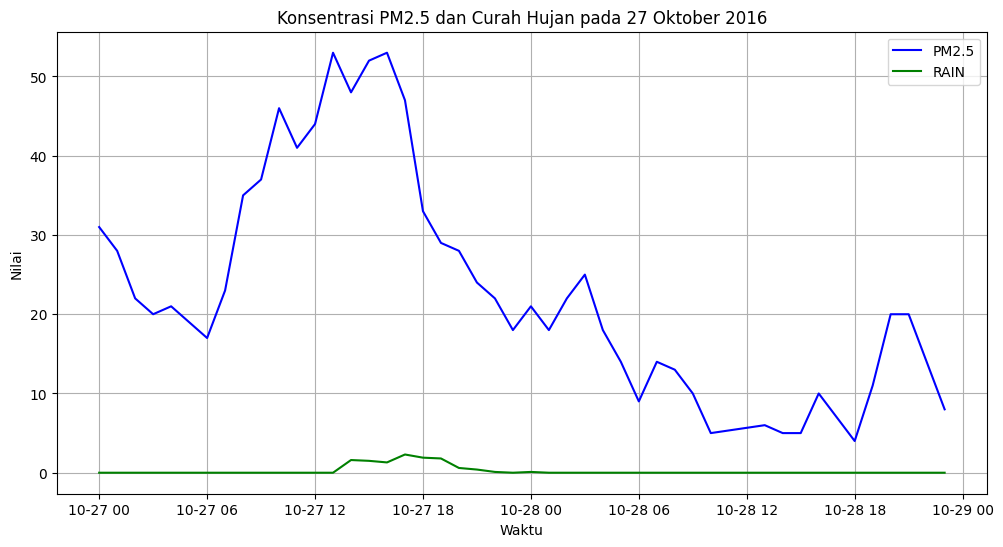

In [43]:
pm25_with_rain_df_20161027 = pm25_with_rain_df.loc['2016-10-27': '2016-10-28']

plt.figure(figsize=(12, 6))
plt.plot(pm25_with_rain_df_20161027.index, pm25_with_rain_df_20161027['PM2.5'], label='PM2.5', color='blue')
plt.plot(pm25_with_rain_df_20161027.index, pm25_with_rain_df_20161027['RAIN'], label='RAIN', color='green')

plt.xlabel('Waktu')
plt.ylabel('Nilai')
plt.title('Konsentrasi PM2.5 dan Curah Hujan pada 27 Oktober 2016')
plt.legend()
plt.grid(True)

plt.show()


Insightnya dari penggalan visual data diatas, sesaat mungkin belum terjadi perubahan menonjol pada saat curah hujan naik, akan tetapi polusi udara berangsur-angsur menurun setelah terjadi hujan. Bisa dilihat di jam malam pada tanggal 27 Oktober 2016, dan hari setelahnya.

Mungkin perlu diperiksa kembali pada range data lainnya.

In [44]:
pm25_with_rain_df['RAIN'].max()

46.4

Max dari curah hujan adalah 46.4, asumsinya maka ada cukup banyak data di sekitar nilai tersebut, asumsinya minimum curah hujan tinggi ada diatas 10. Pastikan untuk cari yang berurutan.

In [45]:
pm25_with_rain_df[pm25_with_rain_df['RAIN'] > 10]

,PM2.5,RAIN,HAS_RAIN,PM2.5_scaled
timestamp,,,,
2013-06-11 15:00:00,89.0,13.7,1,0.219388
2013-07-01 20:00:00,215.0,10.9,1,0.540816
2013-07-01 21:00:00,107.0,10.2,1,0.265306
2013-07-01 23:00:00,44.0,14.6,1,0.104592
2013-07-02 00:00:00,38.0,16.6,1,0.089286
2013-07-08 02:00:00,69.0,19.8,1,0.168367
2013-07-08 04:00:00,36.0,10.4,1,0.084184
2013-07-30 23:00:00,100.0,13.1,1,0.247449
2013-08-11 15:00:00,208.0,10.1,1,0.522959


Disini ditemukan ada kejadian hujan cukup tinggi yang berlangsung berturut - turut dari jam 9 pagi tanggal 20 Juli 2016 hingga malam. Mari ambil sample data tersebut (Dari H-1 sampai H+1)

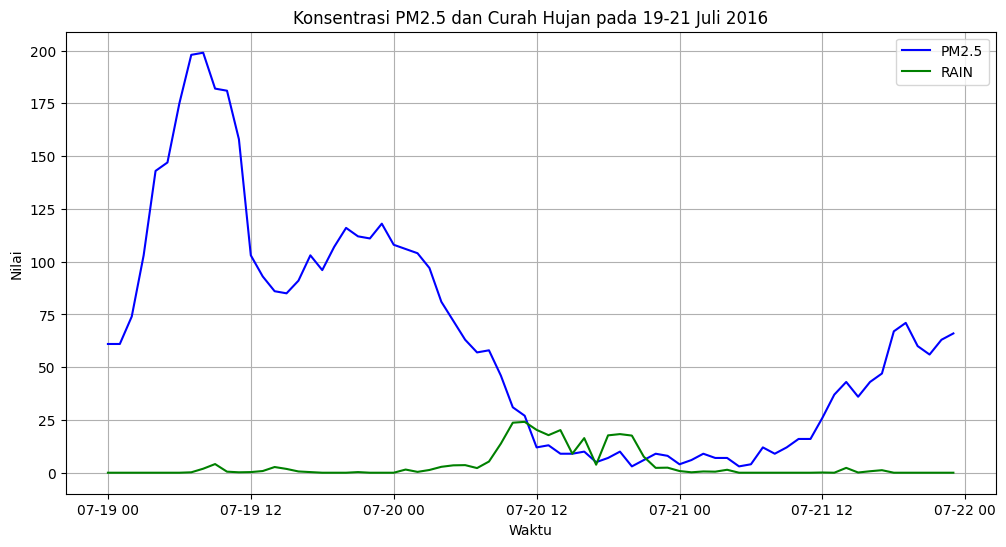

In [46]:
pm25_with_rain_df_20160719_20160721 = pm25_with_rain_df.loc['2016-07-19':'2016-07-21 23:00:00']

plt.figure(figsize=(12, 6))
plt.plot(pm25_with_rain_df_20160719_20160721.index, pm25_with_rain_df_20160719_20160721['PM2.5'], label='PM2.5', color='blue')
plt.plot(pm25_with_rain_df_20160719_20160721.index, pm25_with_rain_df_20160719_20160721['RAIN'], label='RAIN', color='green')

plt.xlabel('Waktu')
plt.ylabel('Nilai')
plt.title('Konsentrasi PM2.5 dan Curah Hujan pada 19-21 Juli 2016')
plt.legend()
plt.grid(True)

plt.show()


Dari sini sebenarnya cukup terkonfirmasi bahwa adanya hujan dapat membantu menurunkan konsentrasi PM2.5 setelah kejadian hujan tersebut.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana index polusi udara dalam beberapa bulan atau tahun terakhir yang tertulis dalam index PM2.5 dan PM10? Apakah ada peningkatan pada setiap bulannya ?

In [47]:
visualize_pm25_and_pm10_last_year = pm25_and_pm10_df_monthly_mean.tail(12)
visualize_pm25_and_pm10_last_year.head()

,PM2.5,PM10
timestamp,,
2016-03-31,95.209677,130.256720
2016-04-30,66.724306,109.259028
2016-05-31,55.112231,95.783199
2016-06-30,63.079861,80.795139
2016-07-31,74.420027,82.053091


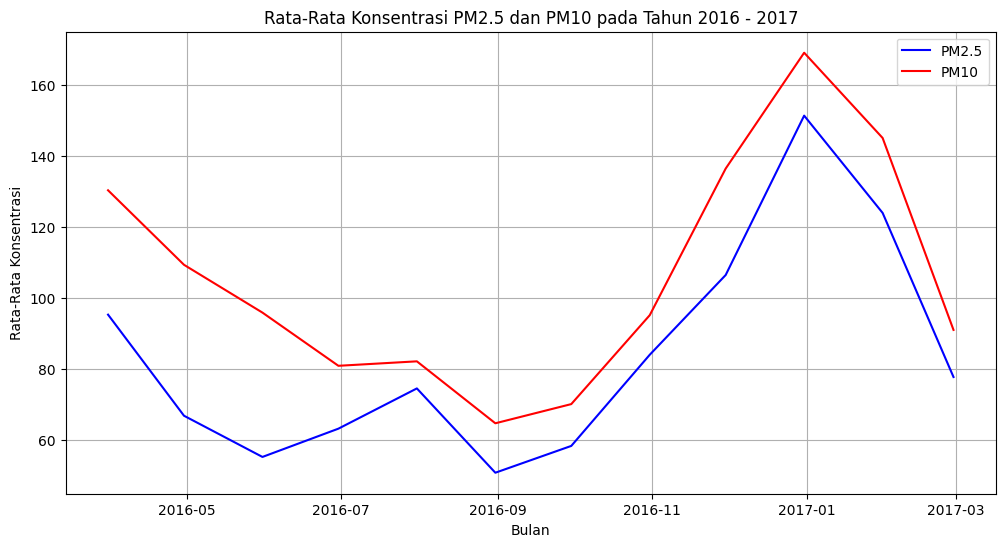

In [48]:
# prompt: Menggunakan visualize_pm25_and_pm10_last_year DataFrame: visualize a plot shows PM2.5 and PM10

plt.figure(figsize=(12, 6))
plt.plot(visualize_pm25_and_pm10_last_year.index, visualize_pm25_and_pm10_last_year['PM2.5'], label='PM2.5', color='blue')
plt.plot(visualize_pm25_and_pm10_last_year.index, visualize_pm25_and_pm10_last_year['PM10'], label='PM10', color='red')

plt.xlabel('Bulan')
plt.ylabel('Rata-Rata Konsentrasi')
plt.title('Rata-Rata Konsentrasi PM2.5 dan PM10 pada Tahun 2016 - 2017')
plt.legend()
plt.grid(True)

plt.show()


Dari grafik diatas, bisa ditemukan bahwa:

1. **Konsentrasi PM10 lebih tinggi dibandingkan dengan PM2.5**:
   Dari grafik, jelas terlihat bahwa konsentrasi PM10 secara konsisten lebih tinggi daripada PM2.5 sepanjang tahun. Ini berarti polutan yang memiliki ukuran partikel lebih besar (PM10) lebih dominan dalam kualitas udara di area tersebut. PM10, yang terdiri dari partikel kasar seperti debu dan kotoran yang lebih besar, sering kali berasal dari aktivitas seperti konstruksi, jalan yang berdebu, atau pembakaran terbuka. Konsentrasi tinggi PM10 dapat menyebabkan penglihatan kabur atau kabut saat konsentrasinya meningkat, terutama seperti yang terlihat pada puncaknya di bulan Desember 2016 dan Januari 2017.

2. **Kenaikan Konsentrasi pada Akhir Tahun**:
   Pada bulan Desember 2016 dan Januari 2017, terjadi lonjakan signifikan baik pada PM2.5 maupun PM10. Fenomena ini mungkin berhubungan dengan aktivitas manusia selama libur tahun baru. Tradisi seperti perayaan dengan kembang api, pembakaran kayu atau arang, serta peningkatan transportasi dapat menyebabkan kenaikan emisi partikel ke udara. Lonjakan signifikan pada bulan Desember 2016 menunjukkan adanya pengaruh eksternal, yang perlu diinvestigasi lebih lanjut, seperti kontribusi dari sumber-sumber pembakaran atau cuaca yang memperparah polusi udara.

3. **Titik Terendah terjadi pada Bulan September**:
   Konsentrasi partikulat, terutama PM2.5, menunjukkan penurunan terendah pada bulan September 2016. Hal ini mungkin disebabkan oleh perubahan musiman, misalnya saat akhir musim panas di mana aktivitas pembakaran berkurang dan kondisi cuaca lebih stabil, seperti hujan atau angin yang membantu membersihkan partikel polusi di udara.

### Pertanyaan 2: Berapa emisi gas karbon (CO) yang keluar dalam beberapa bulan terakhir ?

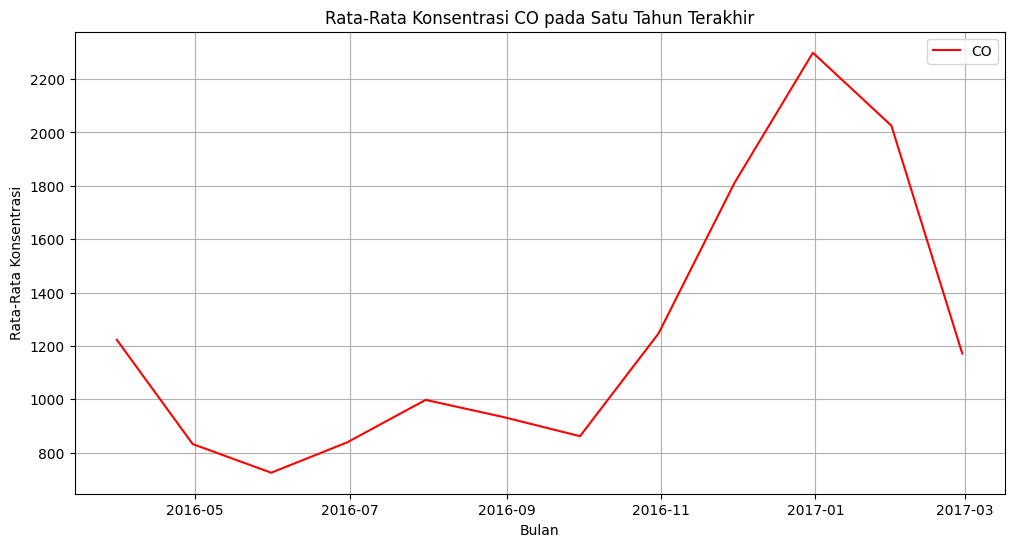

In [49]:
co_df_monthly_mean_last_year = co_df_monthly_mean.tail(12)

plt.figure(figsize=(12, 6))
plt.plot(co_df_monthly_mean_last_year.index, co_df_monthly_mean_last_year['CO'], label='CO', color='red')

plt.xlabel('Bulan')
plt.ylabel('Rata-Rata Konsentrasi')
plt.title('Rata-Rata Konsentrasi CO pada Satu Tahun Terakhir')
plt.legend()
plt.grid(True)

plt.show()

Dari grafik diatas, bisa ditemukan bahwa :

1. **Peningkatan Konsentrasi CO di Akhir Tahun**:
   Data menunjukkan peningkatan signifikan dalam konsentrasi CO pada akhir tahun, terutama pada bulan Desember 2016 dan Januari 2017, dengan puncak tertinggi terjadi pada bulan Desember (2.299,13 µg/m³). Peningkatan ini mungkin berkorelasi dengan peningkatan aktivitas manusia selama liburan akhir tahun, seperti penggunaan kendaraan bermotor yang lebih intensif, pembakaran bahan bakar, dan penggunaan kembang api. Aktivitas-aktivitas ini umumnya menghasilkan emisi gas karbon monoksida yang tinggi. Fenomena ini juga serupa dengan peningkatan konsentrasi PM2.5 dan PM10 di periode yang sama, menunjukkan bahwa berbagai jenis polutan udara meningkat selama periode ini.

2. **Konsentrasi CO Terendah di Bulan Juni**:
   Pada bulan Juni 2016, konsentrasi CO mencapai titik terendah (838,06 µg/m³). Penurunan ini kemungkinan besar disebabkan oleh faktor musiman, di mana cuaca dan pola angin mungkin berperan dalam penyebaran emisi, sehingga membantu membersihkan udara. Selain itu, bulan Juni biasanya kurang dipengaruhi oleh aktivitas manusia yang intens, seperti perayaan atau kegiatan industri besar. Oleh karena itu, polusi cenderung menurun di bulan ini dibandingkan dengan bulan-bulan lain dalam setahun.

### Pertanyaan 3: Apakah ada hubungan antara turunnya hujan dengan menurunnya kadar polusi udara PM2.5 ?

Mari kita periksa kembali nilai korelasi pada dataframe pm25_with_rain_df

In [50]:
pm25_with_rain_df.corr()

,PM2.5,RAIN,HAS_RAIN,PM2.5_scaled
PM2.5,1.000000,-0.020933,-0.050535,1.000000
RAIN,-0.020933,1.000000,0.401503,-0.020933
HAS_RAIN,-0.050535,0.401503,1.000000,-0.050535
PM2.5_scaled,1.000000,-0.020933,-0.050535,1.000000


Dari nilai korelasi diatas, secara statistika membuktikan bahwa data PM2.5 tidak ada korelasinya langsung dengan RAIN (Curah Hujan).

Kemudian, dari sample data kejadian hujan pada tanggal 27 - 28 oktober 2016 berikut ini (Dari kejadian hujan sampai berhenti di hari berikutnya)

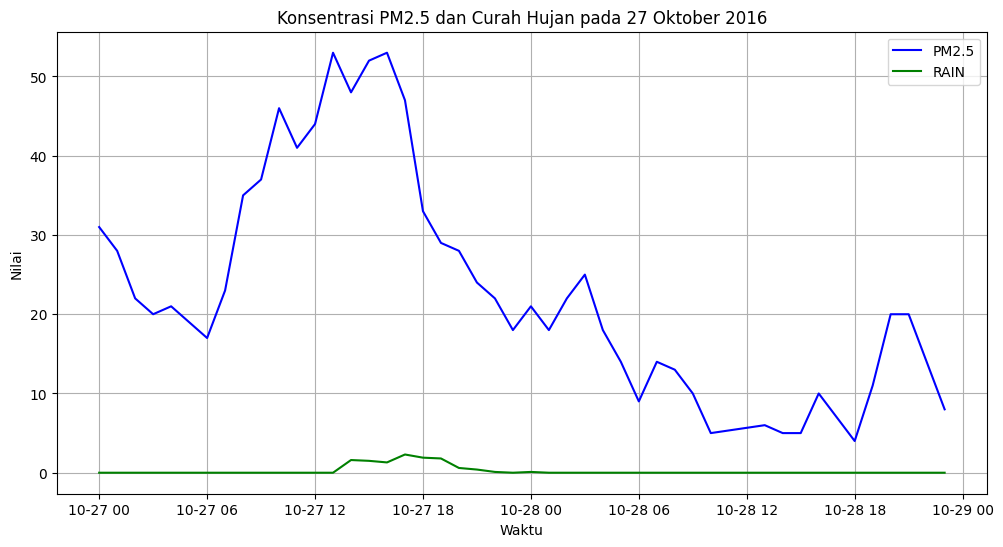

In [51]:
pm25_with_rain_df_20161027 = pm25_with_rain_df.loc['2016-10-27': '2016-10-28']

plt.figure(figsize=(12, 6))
plt.plot(pm25_with_rain_df_20161027.index, pm25_with_rain_df_20161027['PM2.5'], label='PM2.5', color='blue')
plt.plot(pm25_with_rain_df_20161027.index, pm25_with_rain_df_20161027['RAIN'], label='RAIN', color='green')

plt.xlabel('Waktu')
plt.ylabel('Nilai')
plt.title('Konsentrasi PM2.5 dan Curah Hujan pada 27 Oktober 2016')
plt.legend()
plt.grid(True)

plt.show()

Dan juga dari visualisasi data kejadian curah hujan berikutnya, yakni dari kejadian yang ditemukan dan berlangsung berturut - turut dari jam 9 pagi tanggal 20 Juli 2016 (H-1 dan H+1), divisualisasi berikut :

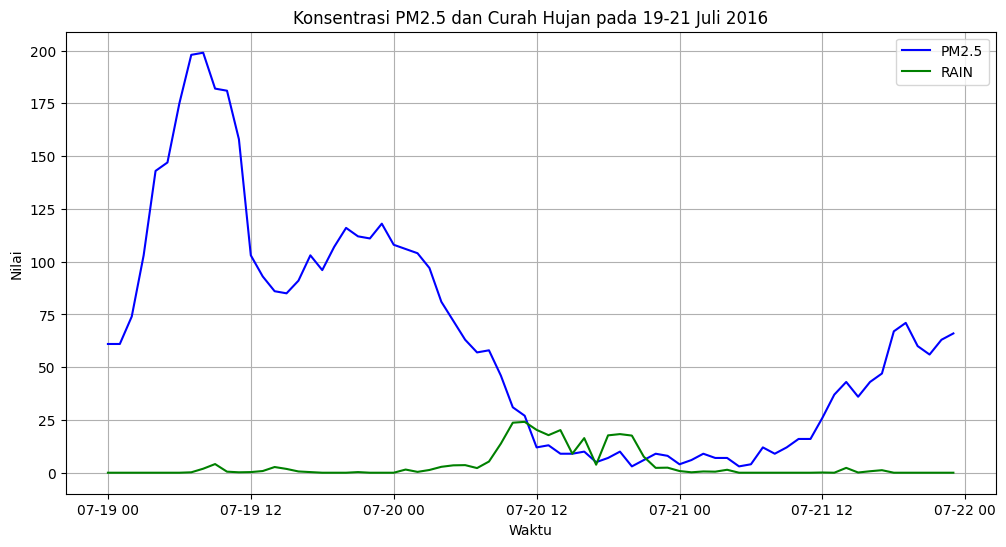

In [52]:
pm25_with_rain_df_20160719_20160721 = pm25_with_rain_df.loc['2016-07-19':'2016-07-21 23:00:00']

plt.figure(figsize=(12, 6))
plt.plot(pm25_with_rain_df_20160719_20160721.index, pm25_with_rain_df_20160719_20160721['PM2.5'], label='PM2.5', color='blue')
plt.plot(pm25_with_rain_df_20160719_20160721.index, pm25_with_rain_df_20160719_20160721['RAIN'], label='RAIN', color='green')

plt.xlabel('Waktu')
plt.ylabel('Nilai')
plt.title('Konsentrasi PM2.5 dan Curah Hujan pada 19-21 Juli 2016')
plt.legend()
plt.grid(True)

plt.show()

Menunjukkan bahwa :

1. **Memang, tidak Ada korelasi langsung antar PM2.5 dengan RAIN**:
   Dari data korelasi, memang terlihat bahwa tidak ada hubungan langsung yang signifikan antara curah hujan (RAIN) dengan konsentrasi PM2.5. Nilai korelasi antara PM2.5 dan RAIN hanya sekitar -0.02, yang menunjukkan bahwa curah hujan tidak secara konsisten berbanding terbalik dengan kadar PM2.5. Dengan kata lain, turunnya hujan tidak secara langsung menurunkan konsentrasi polutan di udara berdasarkan hubungan statistik sederhana. Hal ini mungkin disebabkan oleh berbagai faktor lain yang mempengaruhi konsentrasi PM2.5, seperti sumber polusi, arah angin, dan kondisi lainnya, yang tidak semuanya bergantung pada curah hujan.

2. **Nilai PM2.5 yang menurun setelah hujan mereda**:
   Meskipun tidak ada korelasi langsung, data empiris menunjukkan bahwa setelah hujan terjadi, konsentrasi PM2.5 cenderung menurun secara signifikan. Ini terlihat dari contoh yang diberikan, baik pada 27 Oktober 2016 maupun 19-21 Juli 2016. Penurunan konsentrasi PM2.5 setelah hujan dapat dijelaskan melalui proses fisik di atmosfer. Ketika hujan turun, butiran air menangkap partikel polusi (PM2.5) di udara dan membawanya turun ke permukaan tanah, sehingga mengurangi konsentrasi partikel tersebut di udara.

## Analisis Lanjutan (Opsional)

Visualisasi sebelumnya telah berhasil dalam menampilkan data polusi udara yang direkam pada rentang waktu satu hari dan juga per bulan. Misalnya untuk menampilkan rentang waktu yang terjadi di tahun 2016 seperti berikut ini.

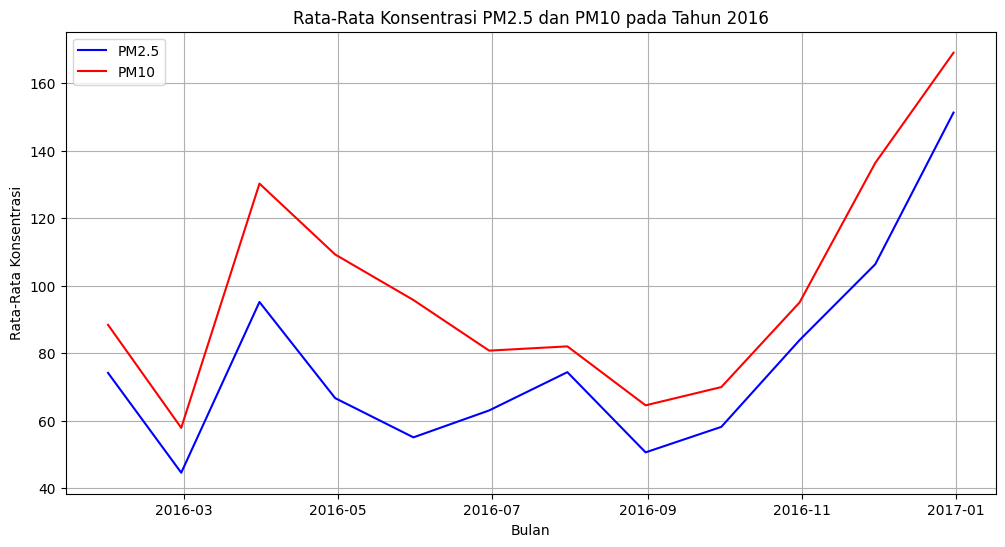

In [53]:
pm25_and_pm10_df_monthly_mean_2016 = pm25_and_pm10_df_monthly_mean.loc['2016-01':'2016-12']

plt.figure(figsize=(12, 6))
plt.plot(pm25_and_pm10_df_monthly_mean_2016.index, pm25_and_pm10_df_monthly_mean_2016['PM2.5'], label='PM2.5', color='blue')
plt.plot(pm25_and_pm10_df_monthly_mean_2016.index, pm25_and_pm10_df_monthly_mean_2016['PM10'], label='PM10', color='red')

plt.xlabel('Bulan')
plt.ylabel('Rata-Rata Konsentrasi')
plt.title('Rata-Rata Konsentrasi PM2.5 dan PM10 pada Tahun 2016')
plt.legend()
plt.grid(True)

plt.show()


Nah, data ini sudah cukup terbaca, akan tetapi bagaimana jika kita bisa menganalisisnya lebih lanjut? Seperti menampilkan perubahan yang terjadi per bulan dalam tiap tahun. Maka dari itu, kita bisa melakukan pivot table untuk mengelompokkan PM2.5 dalam tiap kolom bulan di setiap row tahun.

In [54]:
pm25_and_pm10_df_monthly_for_optional = pm25_and_pm10_df_monthly_mean.copy()
pm25_and_pm10_df_monthly_for_optional.index = pm25_and_pm10_df_monthly_for_optional.index.to_period('M')

pm25_yearly_df = pm25_and_pm10_df_monthly_for_optional[['PM2.5']].copy()
pm25_yearly_df['year'] = pm25_yearly_df.index.year
pm25_yearly_df['month'] = pm25_yearly_df.index.month
pm25_yearly_df = pm25_yearly_df.pivot(index='year', columns='month', values='PM2.5')

pm10_yearly_df = pm25_and_pm10_df_monthly_for_optional[['PM10']].copy()
pm10_yearly_df['year'] = pm10_yearly_df.index.year
pm10_yearly_df['month'] = pm10_yearly_df.index.month
pm10_yearly_df = pm10_yearly_df.pivot(index='year', columns='month', values='PM10')

Pastikan bahwa pivot dari dataframe berjalan dengan baik. Ambil contoh sample pada pm25

In [55]:
pm25_yearly_df.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2013,NaN,NaN,106.478495,78.903472,81.770161,105.201389,68.150538,59.399194,61.287500,98.983871,84.322222,92.133737
2014,113.661290,151.579613,98.742608,86.693750,64.667876,58.036111,85.527554,64.421371,73.937917,112.123656,102.474722,68.961962
2015,101.964113,103.096125,87.669355,72.450000,54.477823,59.297917,61.665995,45.938844,53.082639,76.837366,122.081944,157.120296
2016,74.194220,44.636494,95.209677,66.724306,55.112231,63.079861,74.420027,50.663978,58.217391,83.906586,106.381944,151.291667
2017,123.875853,77.634673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


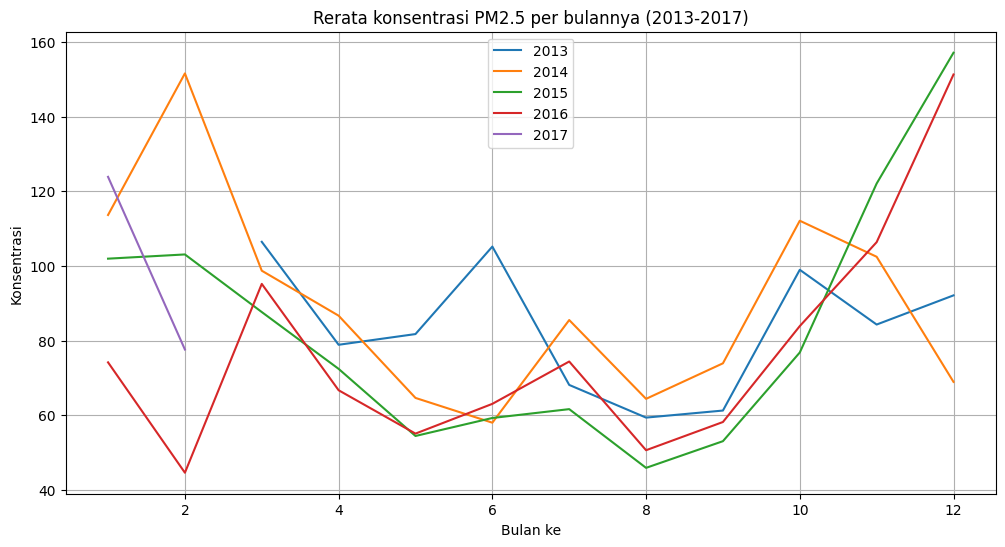

In [56]:
plt.figure(figsize=(12, 6))

for year in pm25_yearly_df.index:
  plt.plot(pm25_yearly_df.columns, pm25_yearly_df.loc[year], label=str(year))

plt.xlabel('Bulan ke')
plt.ylabel('Konsentrasi')
plt.title('Rerata konsentrasi PM2.5 per bulannya (2013-2017)')
plt.legend()
plt.grid(True)
plt.show()

Dari visualisasi grafik **rerata konsentrasi PM2.5 per bulannya (2013-2017)**, beberapa kesimpulan dapat diambil sebagai berikut:

1. **Ditemukannya Pola Musiman pada Konsentrasi PM2.5**:
   Visualisasi diatas menunjukkan adanya pola musiman di mana konsentrasi PM2.5 cenderung lebih rendah pada pertengahan tahun (sekitar bulan Juni hingga Agustus), kemudian mengalami kenaikan signifikan menjelang akhir tahun (sekitar bulan Oktober hingga Desember).

2. **Kenaikan Konsentrasi PM2.5 di Akhir Tahun**:
   Di semua tahun, terlihat adanya kenaikan yang signifikan pada bulan November dan Desember. Hal ini bisa disebabkan oleh peningkatan aktivitas manusia pada akhir tahun, seperti pembakaran biomassa atau penggunaan transportasi yang meningkat. Misalnya, pada tahun 2015 dan 2016, konsentrasi PM2.5 pada bulan Desember melonjak cukup tajam dibandingkan bulan-bulan sebelumnya.

## Conclusion

- Dari hasil analisa pada pertanyaan pertama, ditemukan konklusi bahwa peningkatan PM2.5 dan PM10 terjadi pada masa akhir tahun sampai awal tahun baru. Hal ini bisa terjadi sebagai akibat dari aktifitas manusia yang tinggi pada saat itu, misalnya adalah pesta kembang api, dan awal kembali lagi ke kota dan masuk kerja awal tahun yang menyumbang polusi udara.
- Hasil dari pertanyaan kedua, yakni kondisi konsentrasi CO, cenderung memiliki visualisasi yang kurang lebih sama dengan PM2.5 dan PM10 karena ia juga merupakan partikel PM2.5. Meningkat pada akhir dan awal tahun baru, akan tetapi perbedaannya terletak pada titik rendahnya di sekitar bulan Juni.
- Hasil dari pertanyaan ketiga, yakni hubungan antara PM2.5 dengan curah hujan (RAIN). Secara langsung, tidak ditemukan korelasinya. Akan tetapi, pada beberapa kasus seperti pembuktian empiris, ditemukan bahwa konsentrasi PM2.5 cenderung menurun setelah hujan terjadi. Ini disebabkan karena partikel air hujan dapat membersihkan partikulat polusi yang beredar diudara (seperti PM2.5 dan PM10).

## Export Cleaned Data (For Dashboard)

In [57]:
airquality_df.to_csv('airquality_cleaned.csv')